# 2D yield: formation efficiency of mass vs metallicity 

created on May 2 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import seaborn as sns

import h5py as h5
from astropy.table import Table
import astropy.units as u
from scipy.stats import norm as NormDist
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

import sys
import os
import pandas as pd
from matplotlib.gridspec import GridSpec


# # Import functions
# ##############################
# # This path points to the COMPAS functions in your local folder,
# # I've redefined most in this notebook anyway, but I was lazy w.r.t the kroupa IMF etc.
# home_dir = os.path.expanduser("~") 
# sys.path.insert(0,f'{home_dir}/Programs/COMPAS/utils/CosmicIntegration/')

# # import FastCosmicIntegration as COMPAS_sfrd
# # import ClassCOMPAS as COMPAS_class

# from importlib import reload  # Python 3.4+
# reload(COMPAS_sfrd)
##############################

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

######################################
## locations
home_dir = os.path.expanduser("~") 
compas_v = "v03.01.02" # "v02.46.01/"#v02.35.02/"
datar_root =  f"{home_dir}/ceph/CompasOutput/{compas_v}/"
sim_name        =  'NewWinds_RemFryer2012_noBHkick'#  'NewWinds_RemFryer2012_noNSBHkick'#'OldWinds_RemFryer2012'#  
channel_key     = '' #'', '_stable' # '_CE' '_CHE'  '' 


# proj_dir    = home_dir+'/Winds2/'
# save_loc    = proj_dir +'plots/'
# data_dir    = home_dir+'/ceph/CompasOutput/v03.35.02/'
# file_name   = '/MainRun/COMPAS_Output.h5' # '/MainRun/COMPAS_Output_wWeights.h5'


# Let's load our simulations 

(And check that everything looks OK!)

In [18]:
# #########################################
# # Chirp mass
# #########################################
# def Mchirp(m1, m2):
#     chirp_mass = np.divide(np.power(np.multiply(m1, m2), 3./5.), np.power(np.add(m1, m2), 1./5.))
#     return chirp_mass    

# #########################################
# # Read data
# #########################################
# def read_data(loc = '/output/COMPAS_Output_wWeights.h5', verbose=False, rate_key = None,
#               DCO_keys = ['SEED','Metallicity@ZAMS(1)','Mass(1)','Mass(2)','Stellar_Type(1)','Stellar_Type(2)','Immediate_RLOF>CE','Optimistic_CE','Merges_Hubble_Time'],
#               SYS_keys = ['Stellar_Type@ZAMS(1)','Stellar_Type@ZAMS(2)', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)','SemiMajorAxis@ZAMS']):
#                         #   'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Phi(1)', 'SN_Kick_Theta(1)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(2)', 'SN_Kick_Magnitude_Random_Number(2)']):
#     """
#         Read DCO and merger rate data incl necesary data to re-run systems
#         'Kick_Mean_Anomaly(1)',
#         'Kick_Mean_Anomaly(2)',
#         Args:
#             loc                  --> [string] Location of data
#             verbose              --> [bool] If you want to print statements while reading in 
#             rate_key             --> [string] Key of rate table to read in
#             DCO_keys             --> [list of strings] Keys of DCO table to read in
#             SYS_keys             --> [list of strings] Keys of SYS table to read into the DCO table (note these include params that allow re-running systems)
#         Returns:
#             DCO                   --> [astropy table] DCO table with all the relevant columns
#             rate_table            --> [2D float array] Intrinsic merger rate density for each binary at new crude redshiftbins in 1/yr/Gpc^3
#     """
#     ################################################
#     ## Open hdf5 file and read relevant columns
#     File        = h5.File(loc ,'r')
#     if verbose: print('Reading ',loc)         

#     DCO = Table()

#     # Old and new naming of COMPAS columns
#     try:
#         dcokey,  syskey, CEcount, dcomask = 'BSE_Double_Compact_Objects', 'BSE_System_Parameters', 'CE_Event_Counter', 'DCOmask'
#         DCO['SEED']            = File[dcokey]['SEED'][()] 
#     except:
#         dcokey,  syskey, CEcount, dcomask = 'DoubleCompactObjects', 'SystemParameters', 'CE_Event_Count', 'DCOmask' 
#         DCO['SEED']            = File[dcokey]['SEED'][()] 
    
#     # Because I ran every system at differen metallicities, the SEED is no longer unique
#     # This is why we create a new SEED + metallicity identifier that should be unique
#     DCO['unique_Z_SEED'] = np.array([f"{seed}_{Z:.5f}" for seed, Z in zip(DCO['SEED'], File[dcokey]['Metallicity@ZAMS(1)'][()])])
#     sys_seeds         = File[syskey]['SEED'][()]
#     sys_metallicities = File[syskey]['Metallicity@ZAMS(1)'][()]
#     SYS_unique_seeds     = np.array([f"{seed}_{Z:.5f}" for seed, Z in zip(sys_seeds, File[syskey]['Metallicity@ZAMS(1)'][()])])

#     print('len(np.unique(SYS_unique_seeds))', len(np.unique(SYS_unique_seeds)))

#     # Check if you can with AIS
#     try:
#         DCO['mixture_weight']   = File[dcokey]['mixture_weight'][()] 
#     except:
#         print('mixture_weight column doesnt exist, will use weights = 1')
#         DCO['mixture_weight']   = np.full(len(DCO), 1.) 

#     # Read in DCO columns
#     for key in DCO_keys:
#         if verbose: print(f"Processing key: {key}")
#         DCO[key] =  File[dcokey][key][()]

#     # Additional columns
#     DCO['M_moreMassive']         = np.maximum(DCO['Mass(1)'], DCO['Mass(2)'])
#     DCO['M_lessMassive']         = np.minimum(DCO['Mass(1)'], DCO['Mass(2)'])
#     DCO['Mchirp']                = Mchirp(DCO['M_moreMassive'], DCO['M_lessMassive'])

#     # Make pointer to seeds in SYS (the SYS table is so stupidly slow becaue the grid run saves ALL keys... keep in mind when re-running grid!)
#     DCO_SEED_set = set(DCO['unique_Z_SEED']) # Make set for quick lookup
#     # SYS_mask = np.in1d(All_data['BSE_System_Parameters']['SEED'][()], All_DCO_seeds)
#     # SYS_DCO_seeds_bool = np.in1d(DCO_SEED_set, SYS_unique_seeds)
#     SYS_DCO_seeds_bool = np.array([item in DCO_SEED_set for item in SYS_unique_seeds])
    
#     print('len(SYS_DCO_seeds_bool)', len(SYS_DCO_seeds_bool), 'sum(SYS_DCO_seeds_bool)', sum(SYS_DCO_seeds_bool) )
#     print('len(DCO[SEED])', len(DCO['SEED']) )

#     print('len(File[syskey][SEED][()])', len(File[syskey]['SEED'][()]) )
#     print('File[syskey].keys()', File[syskey].keys())

#     # SYS_DCO_seeds_bool           = np.in1d(File[syskey]['SEED'][()], DCO['SEED']) #Bool to point SYS to DCO
#     for key in SYS_keys:
#         if verbose: print(f"Processing key: {key}")
#         Data = File[syskey][key][()]
#         DCO[key] = Data[SYS_DCO_seeds_bool]

#     #############################
#     # What SFR * dPdZ to use
#     if rate_key is None:
#         rate_key = 'Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned'

#     # Rate data
#     rate_table = Table()
#     try:
#         with h5.File(loc,'r') as File:
#             print(File.keys())
#             if rate_key in File.keys():
#                 final_rate_key = rate_key
#             else:
#                 final_rate_key = next((key for key in File.keys() if key.startswith('Rates_')), None)
#             print('Using rate key: ', final_rate_key)
#             rate_table['redshifts']                 = File[final_rate_key]['redshifts'][()]
#             rate_table['DCO_mask']                  = File[final_rate_key]['DCOmask'][()] # Mask from DCO to merging systems  
#             #(contains filter for RLOF>CE and optimistic CE)
#             rate_table['intrinsic_rate_density']    = File[final_rate_key]['merger_rate'][()] # Intrinsic merger rate density for each binary at new crude redshiftbins in 1/yr/Gpc^3
#     except:
#         print('failed to read rates with ', rate_key)

#     File.close()
    
#     return DCO, sys_metallicities, rate_table
        


In [19]:
# DCO, sys_metallicities, rate_table = read_data(loc = f'/mnt/home/lvanson/ceph/CompasOutput/v02.35.02/{sim_name}{file_name}')

In [31]:
    
def get_merging_dcos(sim_name =  'NewWinds_RemFryer2012', prog_table_name = 'potential_DCO_progenitors_Allinfo.h5'):
    """Read in the potential DCO progenitor table and return the tables for BBH, BHNS and NSNS mergers

    Args:
        sim_name (str, optional): which simulation to load Default 'NewWinds_RemFryer2012'.
        prog_table_name (str, optional): 'potential_DCO_progenitors_Allinfo.h5'.

    Returns:
        BBH_progenitors, BHNS_progenitors, NSNS_progenitors: pandas tables containing the progenitors of BBH, BHNS and NSNS mergers
    """
    ####################################
    # Take the base potential DCO progenitor table
    if os.path.isfile(datar_root+ f'/{sim_name}/'+prog_table_name):
        potential_DCO_progenitors = pd.read_hdf(datar_root + f'{sim_name}/' + prog_table_name, key='All_DCO')
        print('Table exists, reading in... ' ) #potential_DCO_progenitors.info()
    else:
        print(f"error reading {datar_root+ f'/{sim_name}/'+prog_table_name}" )
        print('make sure you created it using "DataManipulation.ipynb" first')

    potential_DCO_progenitors.reset_index(drop=True, inplace=True)

    if not 'mixture_weight' in potential_DCO_progenitors.columns:
        potential_DCO_progenitors['mixture_weight'] = np.full(len(potential_DCO_progenitors), 1.)

    # Also make tables that contain only the actual BBH, BHNS and NSNS mergers
    def DCO_merger_bool(table, flavor = 'BBH'):
        """return the DCO merger bool for a given flavor

        Args:
            pandas table: containing all potential DCOs (incl. things that don't become DCO at specific Z)
            flavor (str, optional): BBH, BHNS, or NSNS 
        """
        BBH_bool = np.logical_and(table['Stellar_Type(1)'] == 14,table['Stellar_Type(2)'] == 14)
        BHNS_bool = np.logical_or(np.logical_and(table['Stellar_Type(1)'] == 13,table['Stellar_Type(2)'] == 14),
                                np.logical_and(table['Stellar_Type(1)'] == 14,table['Stellar_Type(2)'] == 13) )
        NSNS_bool = np.logical_and(table['Stellar_Type(1)'] == 13,table['Stellar_Type(2)'] == 13)
        if flavor == 'BBH':
            return np.logical_and(BBH_bool,table['Merges_Hubble_Time'] == True)
        elif flavor == 'BHNS':  
            return np.logical_and(BHNS_bool,table['Merges_Hubble_Time'] == True)
        elif flavor == 'NSNS':
            return np.logical_and(NSNS_bool,table['Merges_Hubble_Time'] == True)

    # make the tables for every flavour
    merging_BBH_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'BBH')
    # BBH_progenitors  = potential_DCO_progenitors[merging_BBH_bool]

    merging_BHNS_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'BHNS')
    # BHNS_progenitors = potential_DCO_progenitors[merging_BHNS_bool]

    merging_NSNS_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'NSNS')
    # NSNS_progenitors = potential_DCO_progenitors[merging_NSNS_bool]

    return potential_DCO_progenitors, [merging_BBH_bool, merging_BHNS_bool, merging_NSNS_bool] #[BBH_progenitors, BHNS_progenitors, NSNS_progenitors]



# Calculate the average SF mass that would have been required to evolve one binary


In [41]:
# Compute the 'total mass evolved per Z'

def totalMassEvolvedPerZ(pathCOMPASh5, x2=0.08, x3=0.5, a1=-0.3, a2=-1.3, a3=-2.3, C1=1.,
                         binaryFraction=0.7, Mmin_universe=0.01, Mmax_universe=300., sampleSize=2000000,
                         metallicity_bins = np.logspace(-4,np.log10(0.03), 10) ):
    """_summary_

    Args:
        # COMPAS simulation parameters
        pathCOMPASh5 (_type_, optional): path to your COMPAS file. Defaults to None.

        # Broken powerlaw (Kroupa IMF) parameters
        x1, x2, x3, x4: float, the break points (mass ranges) for the three segments
        a1, a2, a3: float, the power law indices 
        <0.01 - 0.08> a = -0.3, <0.08 - 0.5> a = -1.3, <0.5 - 200> a = -2.3
        C1: float, the normalization constant for the first segment
        
        # Believes about star formation in the Universe
        binaryFraction (int, optional): What fraction of stars are in binaries. Default= 1.
        Mmin_universe, Mmax_universe (float): the min and max mass that stars in the Universe can be born with  Defaults: 0.01 and 200.

    Returns:
        _type_: _description_
    """ 
    x1 = Mmin_universe
    x4 = Mmax_universe

    # Open the COMPAS file
    COMPASdataf = h5.File(pathCOMPASh5, 'r')

    # Min and max M sampled in your COMPAS simulation.
    COMPAS_m1       = COMPASdataf['BSE_System_Parameters']['Mass@ZAMS(1)'][()]
    Mlower_COMPAS   = np.min(COMPAS_m1)
    Mupper_COMPAS   = np.max(COMPAS_m1)

    ##########################
    # Create Sample Universe 
    ##########################
    # we will use 'inverse transform sampling method' to sample our sample Universe from the IMF

    ### Primary mass
    # first we compute the y-values of the CDF of our IMF at Mmin_universe and Mmax_universe
    # Mmin_universe and Mmax_universe have to be between x1 and x4
    CDFmin = CDFbrokenPowerLaw(np.array([Mmin_universe]), x1, x2, x3, x4, a1, a2, a3, C1)
    CDFmax = CDFbrokenPowerLaw(np.array([Mmax_universe]), x1, x2, x3, x4, a1, a2, a3, C1)

    # Now we can sample Uniformly from the CDF between CDFmin and CDFmax
    drawM1      = np.random.uniform(CDFmin,CDFmax,sampleSize)
    # Convert CDF values back to masses
    M1          = invertCDFbrokenPowerLaw(drawM1, x1, x2, x3, x4, a1, a2, a3, C1)

    ### Binary fraction
    # we want that binaryFraction of the stars are in binaries
    # Hence by drawing between 0-1, we have to throw out everything that is above binaryFraction (i.e. = single and m2 = 0)
    # ! NOTE that this assumes that the binary Fraction is mass indepent! > Future work to implenet Max Moe ps and qs options
    drawBinary      = np.random.uniform(0,1,sampleSize)
    maskBinary      = drawBinary < binaryFraction  #booleans

    ### Secondary mass
    # mass ratio (q = m2/m1) distribution is assumed to be flat 
    # so then the drawM2 (if it is in a binary) just becomes the mass fraction.
    drawM2          = np.random.uniform(0,1,sampleSize)    # we are actually sampling q
    M2              = np.zeros(sampleSize)                 #
    M2[maskBinary]  = drawM2[maskBinary] * M1[maskBinary]  # = q * m1, all the ones outside the mask remain zero
    
    totalMassInStarFormation = np.sum(M1) + np.sum(M2)

    ##########################
    # Select what lies in the range of COMPAS
    ##########################
    # mask M1 and M2 to see what lies in the range of COMPAS
    maskM1          = (M1>=Mlower_COMPAS) & (M1<=Mupper_COMPAS)
    maskBinaries    = (M2!=0)
    mask_COMPAS     = maskM1 & maskBinaries

    totalMassEvolvedCOMPAS = np.sum(M1[mask_COMPAS]) + np.sum(M2[mask_COMPAS])

    ##########################
    # fraction of total universe that was sampled by COMPAS
    fraction_sampled = totalMassEvolvedCOMPAS/float(totalMassInStarFormation)

    # average mass of a binary in COMPAS simulation  
    AverageMassPerBinaryCOMPAS  = totalMassEvolvedCOMPAS / sum(mask_COMPAS)         

    ##########################
    # Finally compute the tot mass evolved per Z
    ##########################
    # load a bit more COMPAS data
    COMPAS_m2       = COMPASdataf['BSE_System_Parameters']['Mass@ZAMS(2)'][()]
    COMPAS_metals   = COMPASdataf['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()]
    uniqueZ_COMPAS, countsZ_COMPAS = np.unique(COMPAS_metals, return_counts=True) #   uniqueZ_COMPAS  = np.unique(COMPAS_metals)
    
    # Determine if your samples are weighted
    boolWeighted = 'mixture_weight' in COMPASdataf['BSE_System_Parameters'].keys()

    # samples are weighted we can't just add M1 + M2 from simulation 
    if boolWeighted: 
        print('Weighted samples')        
        # I assume that if you have more than 100 metallicities, it's not discrete, but a continuous Z distribution
        if len(uniqueZ_COMPAS) > 100: 
            print('using continuous metallicities !! Assumed to be sampled flat-in-log !!')
            bin_indices          = np.digitize(COMPAS_metals, metallicity_bins) # Bin your metallicities
            NbinariesEvolvedPerZ = np.bincount(bin_indices, minlength=len(metallicity_bins) + 1) # Count the number of elements in each bin

        else: 
            print('using discrete metallicities')
            NbinariesEvolvedPerZ    = countsZ_COMPAS

        totalMassEvolvedPerMetallicity  = AverageMassPerBinaryCOMPAS * NbinariesEvolvedPerZ    
       
    # Unweighted samples 
    else: 
        print('UN-weighted samples')
        total = []
        if len(uniqueZ_COMPAS) > 100: 
            print('using continuous metallicities !! Assumed to be sampled flat-in-log !!')
            # loop over each metallicity_bin
            for Z_i in range(len(metallicity_bins) - 1):
                z_bin_mask = (COMPAS_metals >= metallicity_bins[Z_i] ) & (COMPAS_metals < metallicity_bins[Z_i+1])
                total.append( np.sum(COMPAS_m1[z_bin_mask]) + np.sum(COMPAS_m2[z_bin_mask]) )
                
        else: # Simulation with discrete metallicities
            print('using discrete metallicities')
            for Z in uniqueZ_COMPAS:
                Zmask = COMPAS_metals == Z
                total.append( np.sum(COMPAS_m1[Zmask]) + np.sum(COMPAS_m2[Zmask]) )
                
        MassEvolvedPerZ  = np.array(total)  
    
        # We need to muliply the mass evolved per metallicity times (1/fraction) to know the total mass evolved per metallicity
        totalMassEvolvedPerMetallicity = (MassEvolvedPerZ)/(fraction_sampled)

    return AverageMassPerBinaryCOMPAS, totalMassEvolvedPerMetallicity


def CDFbrokenPowerLaw(x, x1=0.01, x2=0.08, x3=0.5, x4=200, a1=-0.3, a2=-1.3, a3=-2.3, C1=1):
    """
    CDF values of a three-part broken powerlaw representing a Kroupa IMF by default.
    
    Parameters:
    x: array-like, the input values
    x1, x2, x3, x4: float, the break points (mass ranges) for the three segments
    a1, a2, a3: float, the power law indices 
    C1: float, the normalization constant for the first segment
    
    Returns:
    yvalues: array-like, the output values of the CDF
    """
    
    # Initialize the output array
    yvalues = np.zeros(len(x))
    
    # Calculate the normalization constants for the other segments
    # Ensuring that the next segments start where the previous segment ends
    C2 = float(C1 * (x2**(a1-a2)))
    C3 = float(C2 * (x3**(a2-a3)))
    
    # Calculate the normalization factors for the three segments
    N1 = float(((1./(a1+1)) * C1 * (x2**(a1+1))) - ((1./(a1+1)) * C1 * (x1**(a1+1))))
    N2 = float(((1./(a2+1)) * C2 * (x3**(a2+1))) - ((1./(a2+1)) * C2 * (x2**(a2+1))))
    N3 = float(((1./(a3+1)) * C3 * (x4**(a3+1))) - ((1./(a3+1)) * C3 * (x3**(a3+1))))
    
    # Calculate the denominator of the CDF
    bottom = N1+N2+N3
    
    # Calculate the CDF values for x range: x1<=x<x2
    mask1 = (x>=x1) & (x<x2)
    top1 = ( (1./(a1+1) ) * C1 * (x[mask1]**(a1+1) ) - (1./(a1+1) ) * C1 * (x1**(a1+1) ) ) 
    yvalues[mask1] = top1/bottom
    
    # Calculate the CDF values for x range: x2<=x<x3
    mask2 = (x>=x2) & (x<x3)
    top2 =  N1 + ( (1./(a2+1) ) * C2 * (x[mask2]**(a2+1) ) - (1./(a2+1)) * C2 * (x2**(a2+1) ) ) 
    yvalues[mask2] = top2/bottom
    
    # Calculate the CDF values for x range: x3<=x<=x4
    mask3 = (x>=x3) & (x<=x4)
    top3 =  N1 + N2 + ( (1./(a3+1)) * C3 * (x[mask3]**(a3+1)) - (1./(a3+1)) * C3 * (x3**(a3+1) ) )
    yvalues[mask3] = top3/bottom
    
    return yvalues


def invertCDFbrokenPowerLaw(CDF, x1, x2, x3, x4, a1, a2, a3, C1):
    """
    Invert y-values of a CDF back to x-vals (i.e. the masses)
    Specifically for a three-part piece-wise powerlaw representing a Kroupa IMF by default. 

    Parameters:
    CDF: array-like, the CDF values to invert
    x1, x2, x3, x4: float, the break points (ranges) for the three segments
    a1, a2, a3: float, the power law indices for the three segments
    C1: float, the normalization constant for the first segment

    Returns:
    xvalues: array-like, the inverted CDF values
    """
    
    # Calculate the normalization constants for the second and third segments
    C2 = float(C1 * (x2**(a1-a2)))
    C3 = float(C2 * (x3**(a2-a3)))
    
    # Calculate the area under the curve for each segment
    N1 = float(((1./(a1+1)) * C1 * (x2**(a1+1))) - ((1./(a1+1)) * C1 * (x1**(a1+1))))
    N2 = float(((1./(a2+1)) * C2 * (x3**(a2+1))) - ((1./(a2+1)) * C2 * (x2**(a2+1))))
    N3 = float(((1./(a3+1)) * C3 * (x4**(a3+1))) - ((1./(a3+1)) * C3 * (x3**(a3+1))))
    
    # Calculate the CDF values at the breakpoints
    CDFx2 = CDFbrokenPowerLaw(np.array([x2,x2]), x1, x2, x3, x4, a1, a2, a3, C1)[0]
    CDFx3 = CDFbrokenPowerLaw(np.array([x3,x3]), x1, x2, x3, x4, a1, a2, a3, C1)[0]

    # Initialize the output array
    xvalues = np.zeros(len(CDF))
    
    # Calculate the inverse CDF values for the first segment
    mask1 = (CDF < CDFx2)
    xvalues[mask1] =  (((CDF[mask1]*(N1+N2+N3))  + \
                      ( (1./(a1+1))*C1*(x1**(a1+1))))/((1./(a1+1))*C1))**(1./(a1+1))
    
    # Calculate the inverse CDF values for the second segment
    mask2 = (CDFx2<= CDF) & (CDF < CDFx3)
    xvalues[mask2] = ((((CDF[mask2]*(N1+N2+N3))-(N1))  + \
                      ( (1./(a2+1))*C2*(x2**(a2+1))))/((1./(a2+1))*C2))**(1./(a2+1))
    
    # Calculate the inverse CDF values for the third segment
    mask3 = (CDFx3<= CDF) 
    xvalues[mask3] = ((((CDF[mask3]*(N1+N2+N3))-(N1+N2))  + \
                      ((1./(a3+1))*C3*(x3**(a3+1))))/((1./(a3+1))*C3))**(1./(a3+1))
    
    # Return the inverse CDF values
    return xvalues


# make 2d histogram of data

In [33]:
# merging_DCO_tables  = get_merging_dcos(sim_name =  sim_name, prog_table_name = f'potential_DCO_progenitors_Allinfo{channel_key}.h5')

potential_DCO_progenitors, DCO_bools = get_merging_dcos(sim_name =  sim_name, prog_table_name = f'potential_DCO_progenitors_Allinfo{channel_key}.h5')
# merging_BBH_bool, merging_BHNS_bool, merging_NSNS_bool = DCO_bools

Table exists, reading in... 


In [55]:
# Define your metallicity bins
Metal_bins = np.logspace(-4,np.log10(0.03), 10)
center_metal_bins = 0.5*(Metal_bins[1:] + Metal_bins[:-1])

 # Create bins using pd.cut
potential_DCO_progenitors['Metallicity_Bin'], Zbin_edges = pd.cut(potential_DCO_progenitors['Metallicity@ZAMS(1)'], bins =12,  retbins=True, include_lowest=True)
print(Zbin_edges)

print(np.unique(potential_DCO_progenitors['Metallicity@ZAMS(1)']))

[7.01000000e-05 2.59166667e-03 5.08333333e-03 7.57500000e-03
 1.00666667e-02 1.25583333e-02 1.50500000e-02 1.75416667e-02
 2.00333333e-02 2.25250000e-02 2.50166667e-02 2.75083333e-02
 3.00000000e-02]
[0.0001     0.00017321 0.0003     0.00054772 0.001      0.002
 0.004      0.00632456 0.01       0.01414214 0.02       0.03      ]


In [42]:
# Get the total mass evolved per Z
AverageMassPerBinaryCOMPAS, totalMassEvolvedPerMetallicity = totalMassEvolvedPerZ(f'{datar_root}/{sim_name}/COMPAS_Output_combinedZ.h5', 
                                                      sampleSize=2000000, metallicity_bins = Metal_bins )
print('Total mass evolved per Z:', totalMassEvolvedPerMetallicity)
print('AverageMassPerBinaryCOMPAS:', AverageMassPerBinaryCOMPAS)


UN-weighted samples
using discrete metallicities
Total mass evolved per Z: [3.83128442e+08 3.83128442e+08 3.83128442e+08 3.83128442e+08
 3.83128442e+08 3.83128442e+08 3.83128442e+08 3.83128442e+08
 3.83128442e+08 3.83128442e+08 3.83128442e+08 3.83128442e+08]


In [39]:
# Group by metallicity
grouped_byZ = potential_DCO_progenitors.groupby('Metallicity@ZAMS(1)')

# BBH_yields = [len(group[group['Merges_Hubble_Time'] == True]) for Z, group in grouped_byZ]


# ax_column[i].plot(np.log10(data['Z_values']/0.014), np.log10(flav_data[f'{channel}_group_lengths']/totalMassEvolvedPerMetallicity))

In [35]:
# # Create some bools for your data
# # Count the number of merging BBH, BHNS, and NSNS                              
# BBH_bool      = np.logical_and(DCO['Stellar_Type(1)'] == 14,DCO['Stellar_Type(2)'] == 14 )
# BHNS_bool     = np.logical_or(np.logical_and(DCO['Stellar_Type(1)'] == 13,DCO['Stellar_Type(2)'] == 14 ),
#                                 np.logical_and(DCO['Stellar_Type(1)'] == 14,DCO['Stellar_Type(2)'] == 13) )
# NSNS_bool     = np.logical_and(DCO['Stellar_Type(1)'] == 13,DCO['Stellar_Type(2)'] == 13 )

# NO_RLOF_CE    = DCO['Immediate_RLOF>CE'] == False
# pessimisticCE = DCO['Optimistic_CE'] == False
# merger        = DCO['Merges_Hubble_Time'] == True

# # Count the systems of interest
# BBH_mask  = BBH_bool * merger * NO_RLOF_CE * pessimisticCE
# NSBH_mask = BHNS_bool * merger * NO_RLOF_CE * pessimisticCE
# NSNS_mask = NSNS_bool * merger * NO_RLOF_CE * pessimisticCE





In [45]:
# Calculate the 'average SF mass needed' for every metal bin

#np.histogram(np.log10(sys_metallicities/0.014), bins=metal_bins) # N systems evolved in each Z bin
N_sys_in_Zbin = np.full(len(np.unique(potential_DCO_progenitors['Metallicity@ZAMS(1)'])), 5e6)  # I know I evolved 5 milion in each bin

weights_per_Zbin = N_sys_in_Zbin * AverageMassPerBinaryCOMPAS
# weights_per_Zbin = weights_per_Zbin.value
print('weights_per_Zbin', weights_per_Zbin)

# hist_values, bin_edges = np.histogram(np.log10(DCO['Metallicity@ZAMS(1)'][mask]/0.014), weights = DCO['mixture_weight'][mask], bins=metal_bins)
# plt.plot(center_metal_bins, hist_values/weights_per_Zbin)
# plt.yscale('log')
# plt.ylim(1e-9, 5*1e-4)
# plt.show()


weights_per_Zbin [58347351.21089334 58347351.21089334 58347351.21089334 58347351.21089334
 58347351.21089334 58347351.21089334 58347351.21089334 58347351.21089334
 58347351.21089334 58347351.21089334 58347351.21089334 58347351.21089334]


In [46]:
import matplotlib.ticker as ticker


color_dict = {'BHBH': '#3d3d3d', 'BHNS': '#487AC5', 'NSNS': '#408F72'}
linecolor_dict = {'BHBH': 'grey', 'BHNS': '#86A2B8', 'NSNS': '#94AEAD'}
masks = DCO_bools #[BBH_mask, NSBH_mask, NSNS_mask] #merging_BBH_bool, merging_BHNS_bool, merging_NSNS_bool

m_lims = [(0, 50), (0, 45), (1, 2.5)]

############################
# Create a figure and fig grid
plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[1.5, 3], width_ratios=[9, 9,9], hspace=0.3)


for m_i, flavour in enumerate(['BHBH', 'BHNS', 'NSNS']):
    mask = masks[m_i]
    print('sum(mask)', sum(mask))

    # Define the bins 
    mass_bins = np.linspace(min(potential_DCO_progenitors['Mass(1)'][mask]), max(potential_DCO_progenitors['Mass(1)'][mask]), num=50)
            
    # Calculate the 2D histogram
    hist_values, x_edges, y_edges = np.histogram2d(
        np.log10(potential_DCO_progenitors['Metallicity@ZAMS(1)'][mask]/0.014), 
        potential_DCO_progenitors['Mass(1)'][mask], 
        weights=potential_DCO_progenitors['mixture_weight'][mask], 
        bins=[metal_bins, mass_bins]
    )

    # Divide by the SF mass per Z bin
    hist_values = hist_values / weights_per_Zbin[:, None]

    ############################
    # plot 1D yields
    ax1 = plt.subplot(gs[0, m_i])
    hist_1d = np.sum(hist_values, axis=1)
    ax1.plot(x_edges[:-1], hist_1d, color=linecolor_dict[flavour], lw = 8)
    ax1.set_ylabel('form. effic.')
    ax1.set_xlabel('log(Z/0.014)')
    ax1.set_yscale('log')
    ax1.set_ylim(1e-8, 5*1e-4)
    ax1.set_title(flavour)

    ############################
    # Plot the 2D histogram
    ax2 = plt.subplot(gs[1,m_i], sharex=ax1)

    # Create a colormap that transitions from white to the base color
    cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', [color_dict[flavour], 'white'])
    cmap_r = colors.LinearSegmentedColormap.from_list('custom_cmap_r', [color_dict[flavour], 'r'][::-1])

    im = ax2.imshow(hist_values.T, origin='lower', aspect='auto', 
            extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
            norm=colors.LogNorm(vmin = 1e-8, vmax = 5*1e-5), cmap=cmap)
    plt.colorbar(im)#, label='form eff.')

    # Add contour lines
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    # levels = [1e-8, 1e-7, 5*1e-7, 1e-6, 5*1e-6, 1e-5]
    contours = ax2.contour(x_centers, y_centers, hist_values.T)#, levels =levels, cmap=cmap_r)
    # Define a custom formatter function
    def fmt(x, pos):
        return "{:.0e}".format(x)

    # Add labels to the contour lines
    plt.clabel(contours, inline=True, fontsize=20, fmt=ticker.FuncFormatter(fmt))

    ax2.set_ylim(m_lims[m_i])
    ax2.set_xlabel('log(Z/0.014)')
    ax2.set_ylabel('Mass(1)')

# plt.savefig(f'../plots/2dyield_{sim_name}.pdf', bbox_inches='tight')

plt.show()

sum(mask) 207667


ValueError: operands could not be broadcast together with shapes (10,10) (12,1) 

<Figure size 1800x600 with 0 Axes>

sum(mask) 10432
sum(mask) 1080
sum(mask) 268


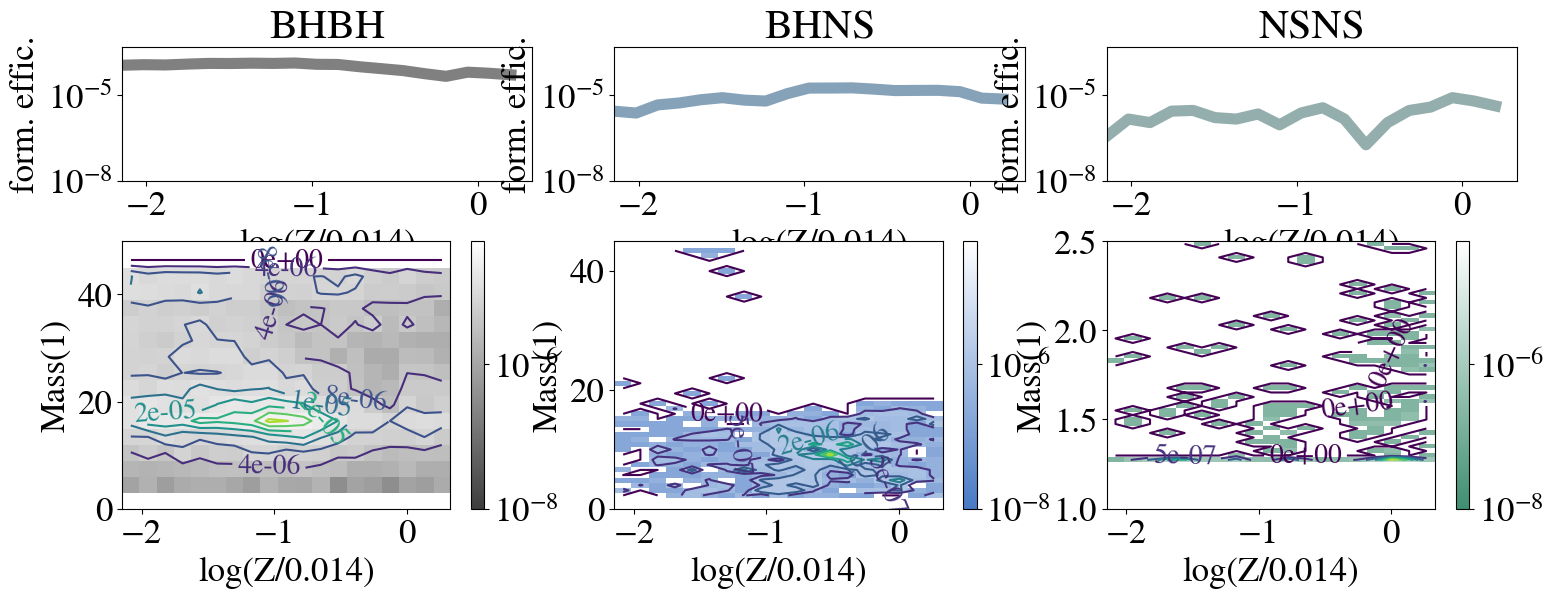

In [37]:
import matplotlib.ticker as ticker

color_dict = {'BHBH': '#3d3d3d', 'BHNS': '#487AC5', 'NSNS': '#408F72'}
linecolor_dict = {'BHBH': 'grey', 'BHNS': '#86A2B8', 'NSNS': '#94AEAD'}
masks = [BBH_mask, NSBH_mask, NSNS_mask]

m_lims = [(0, 50), (0, 45), (1, 2.5)]

############################
# Create a figure and fig grid
plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[1.5, 3], width_ratios=[9, 9,9], hspace=0.3)


for m_i, flavour in enumerate(['BHBH', 'BHNS', 'NSNS']):
    mask = masks[m_i]
    print('sum(mask)', sum(mask))

    # Define the bins 
    mass_bins = np.linspace(min(DCO['Mass(1)'][mask]), max(DCO['Mass(1)'][mask]), num=50)
            
    # Calculate the 2D histogram
    hist_values, x_edges, y_edges = np.histogram2d(
        np.log10(DCO['Metallicity@ZAMS(1)'][mask]/0.014), 
        DCO['Mass(1)'][mask], 
        weights=DCO['mixture_weight'][mask], 
        bins=[metal_bins, mass_bins]
    )

    # Divide by the SF mass per Z bin
    hist_values = hist_values / weights_per_Zbin[:, None]

    ############################
    # plot 1D yields
    ax1 = plt.subplot(gs[0, m_i])
    hist_1d = np.sum(hist_values, axis=1)
    ax1.plot(x_edges[:-1], hist_1d, color=linecolor_dict[flavour], lw = 8)
    ax1.set_ylabel('form. effic.')
    ax1.set_xlabel('log(Z/0.014)')
    ax1.set_yscale('log')
    ax1.set_ylim(1e-8, 5*1e-4)
    ax1.set_title(flavour)

    ############################
    # Plot the 2D histogram
    ax2 = plt.subplot(gs[1,m_i], sharex=ax1)

    # Create a colormap that transitions from white to the base color
    cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', [color_dict[flavour], 'white'])
    cmap_r = colors.LinearSegmentedColormap.from_list('custom_cmap_r', [color_dict[flavour], 'r'][::-1])

    im = ax2.imshow(hist_values.T, origin='lower', aspect='auto', 
            extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
            norm=colors.LogNorm(vmin = 1e-8, vmax = 5*1e-5), cmap=cmap)
    plt.colorbar(im)#, label='form eff.')

    # Add contour lines
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    # levels = [1e-8, 1e-7, 5*1e-7, 1e-6, 5*1e-6, 1e-5]
    contours = ax2.contour(x_centers, y_centers, hist_values.T)#, levels =levels, cmap=cmap_r)
    # Define a custom formatter function
    def fmt(x, pos):
        return "{:.0e}".format(x)

    # Add labels to the contour lines
    plt.clabel(contours, inline=True, fontsize=20, fmt=ticker.FuncFormatter(fmt))

    ax2.set_ylim(m_lims[m_i])
    ax2.set_xlabel('log(Z/0.014)')
    ax2.set_ylabel('Mass(1)')

plt.savefig(f'../plots/2dyield_{sim_name}.pdf', bbox_inches='tight')

plt.show()